In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

df = pd.read_csv("shopping_trends_updated.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
1253,1254,39,Male,Sandals,Footwear,23,Montana,XL,Red,Winter,4.9,No,Express,Yes,Yes,49,PayPal,Annually
2995,2996,29,Female,Jeans,Clothing,96,Virginia,M,Orange,Summer,2.5,No,Standard,No,No,42,Debit Card,Bi-Weekly
1212,1213,32,Male,Shoes,Footwear,74,Pennsylvania,M,Yellow,Summer,2.5,No,Free Shipping,Yes,Yes,18,Credit Card,Weekly
3740,3741,42,Female,Pants,Clothing,96,Virginia,M,Silver,Summer,2.6,No,Store Pickup,No,No,26,Debit Card,Bi-Weekly
2535,2536,47,Male,Coat,Outerwear,80,Vermont,S,Purple,Winter,3.9,No,Express,No,No,39,Bank Transfer,Fortnightly


In [3]:
df.shape

(3900, 18)

In [4]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [5]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
df.duplicated().sum()

0

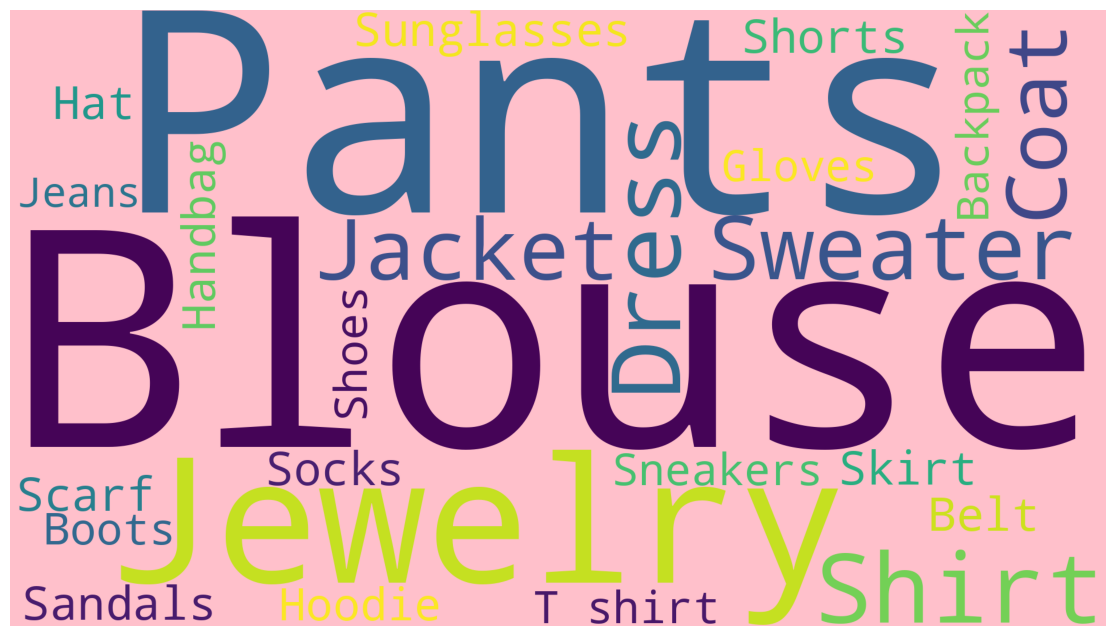

In [38]:
from wordcloud import WordCloud
plt.subplots(figsize=(16,8))
wordcloud = WordCloud(background_color='pink',width=1920,height=1080).generate(" ".join(df['Item Purchased']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [36]:
fig = px.pie(df, names='Gender')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title="Gender"
)
fig.show()

In [72]:
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


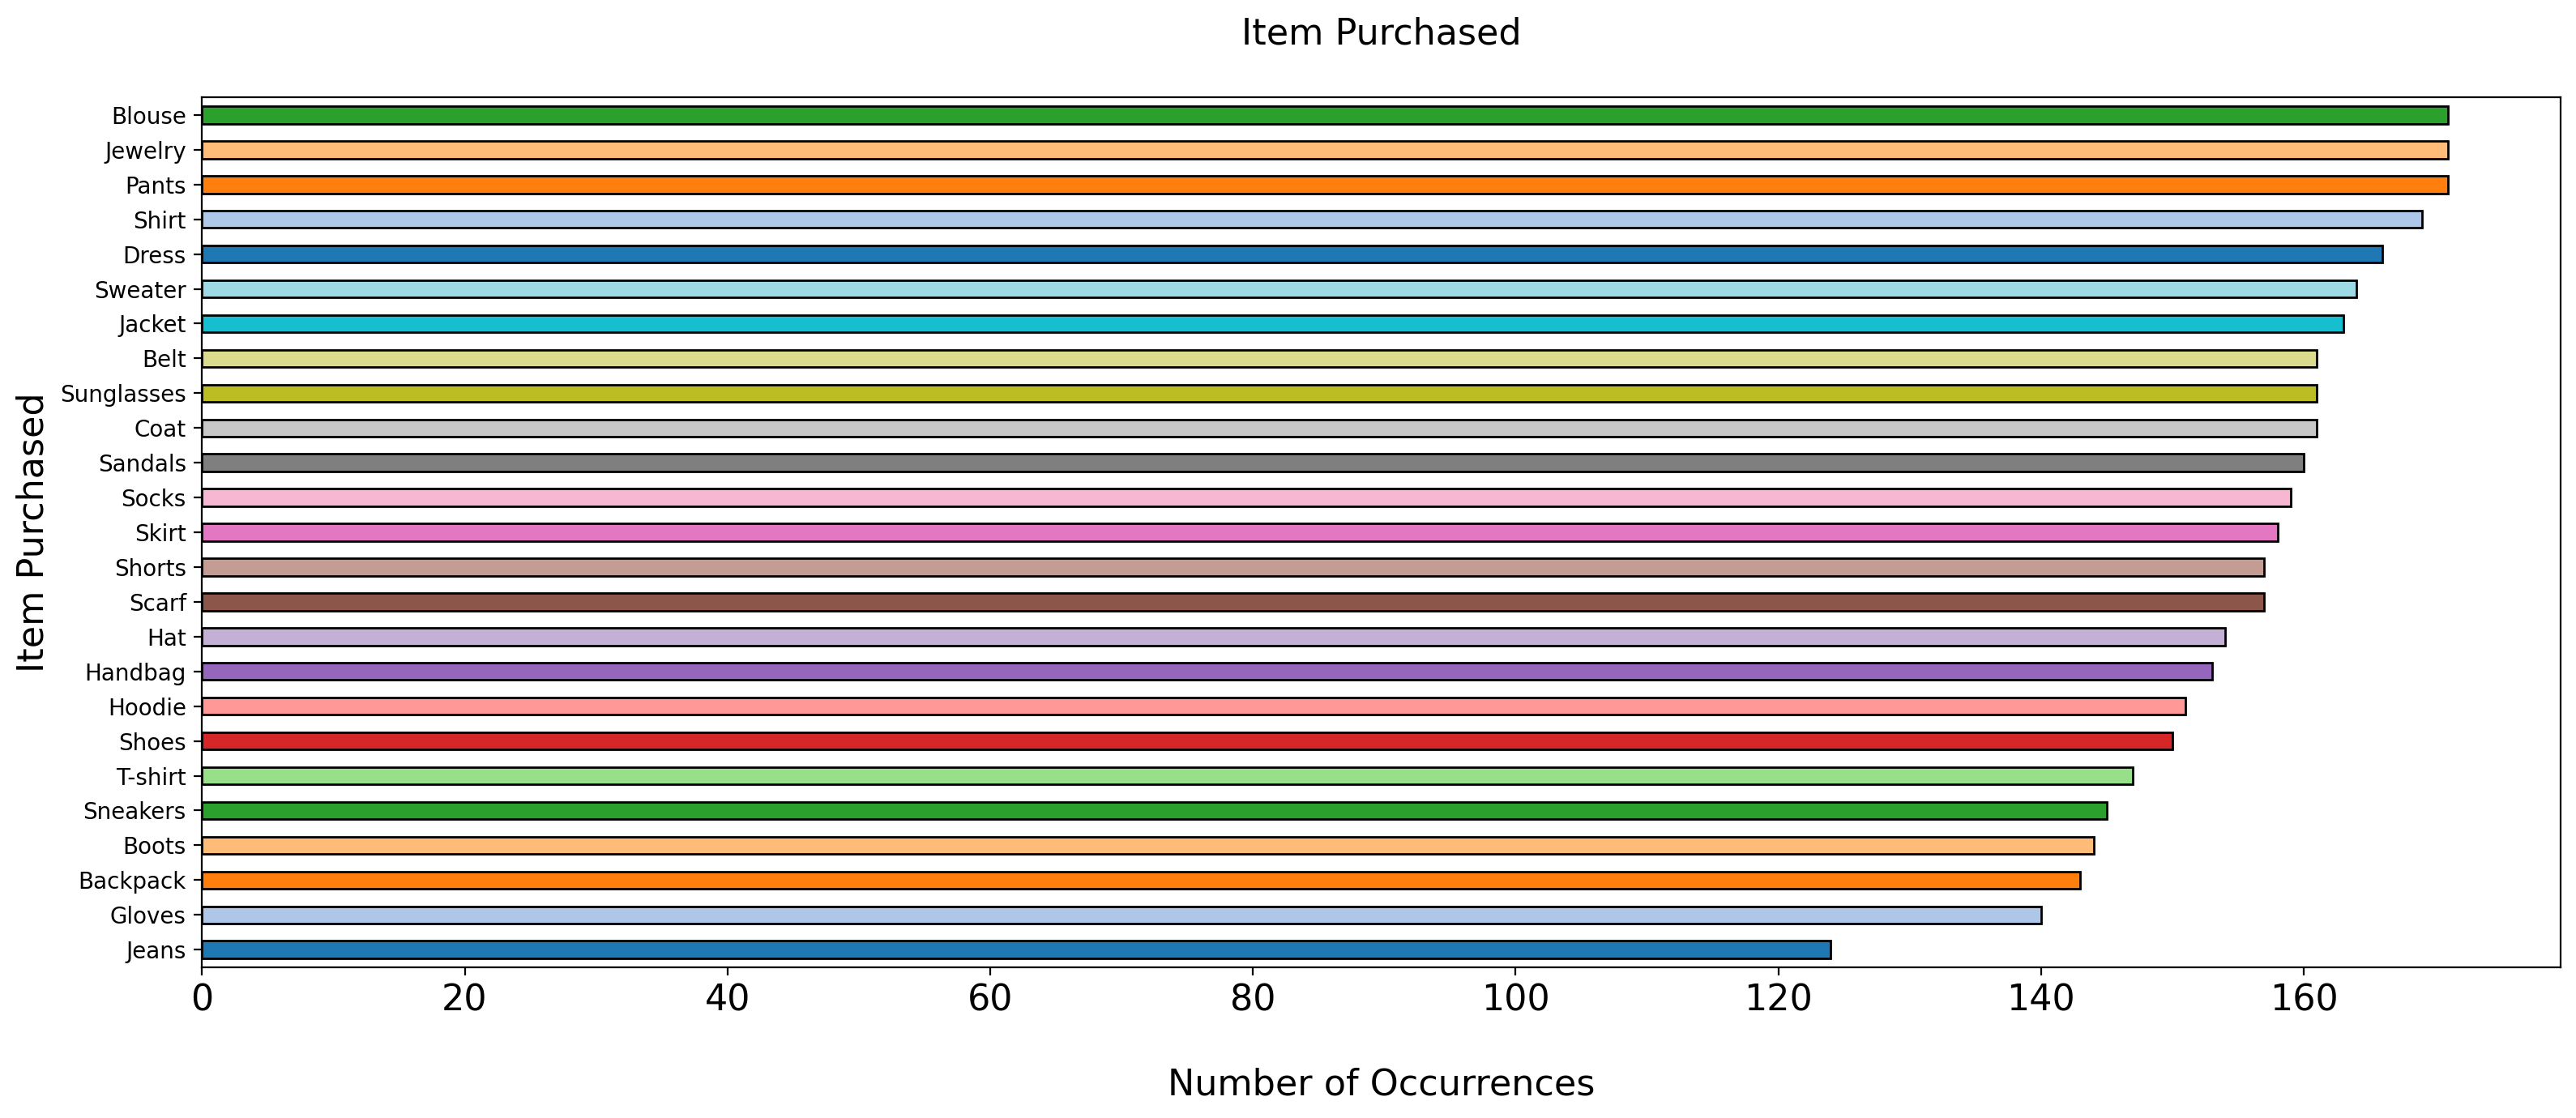

In [16]:
plt.figure(figsize = (16, 7), dpi=200)
df["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

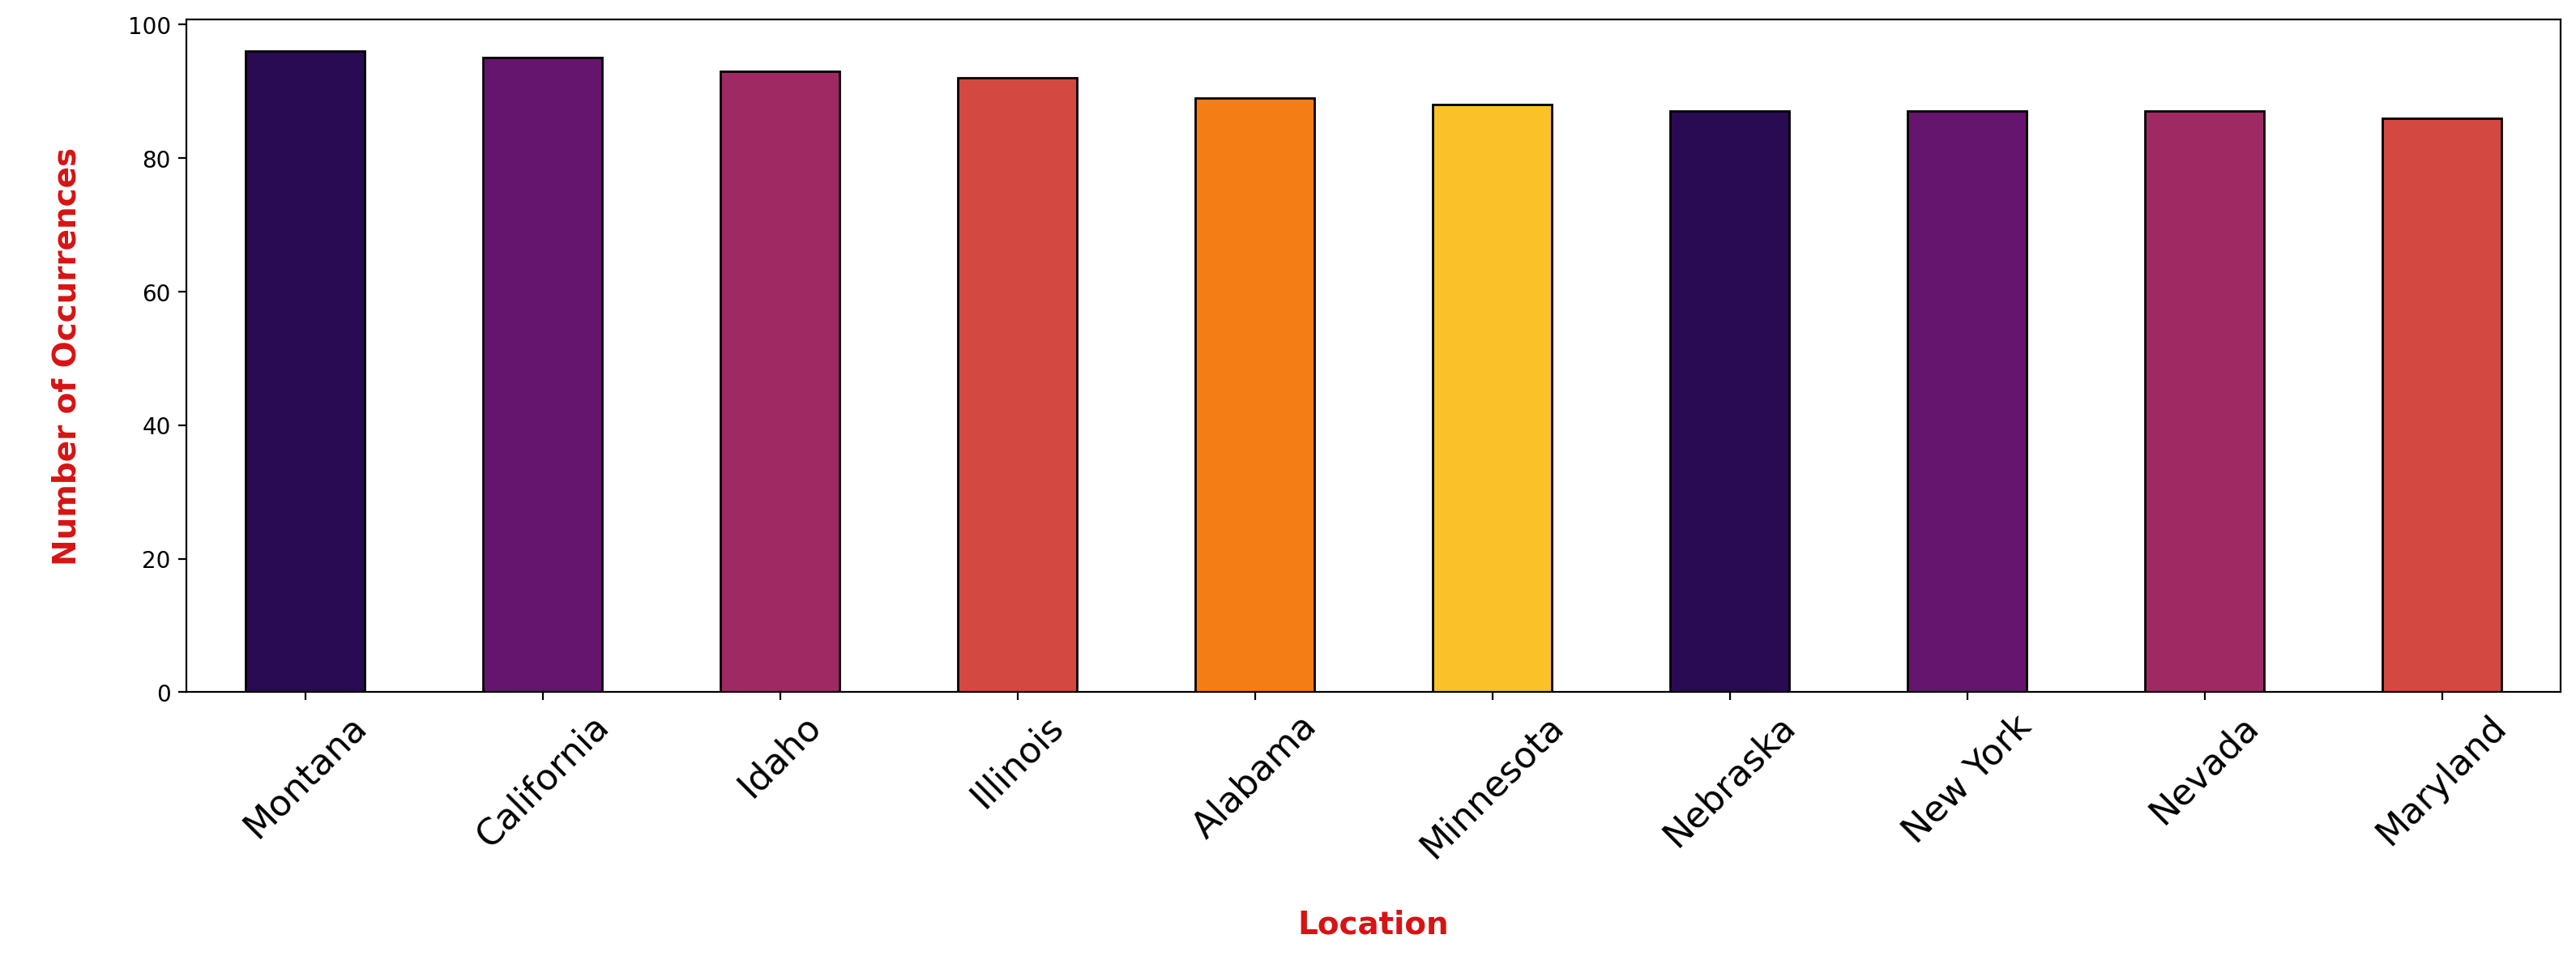

In [30]:
plt.figure(figsize = (16, 6), dpi=200)
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks( fontsize = 16, rotation=45)
plt.tight_layout()
plt.show()

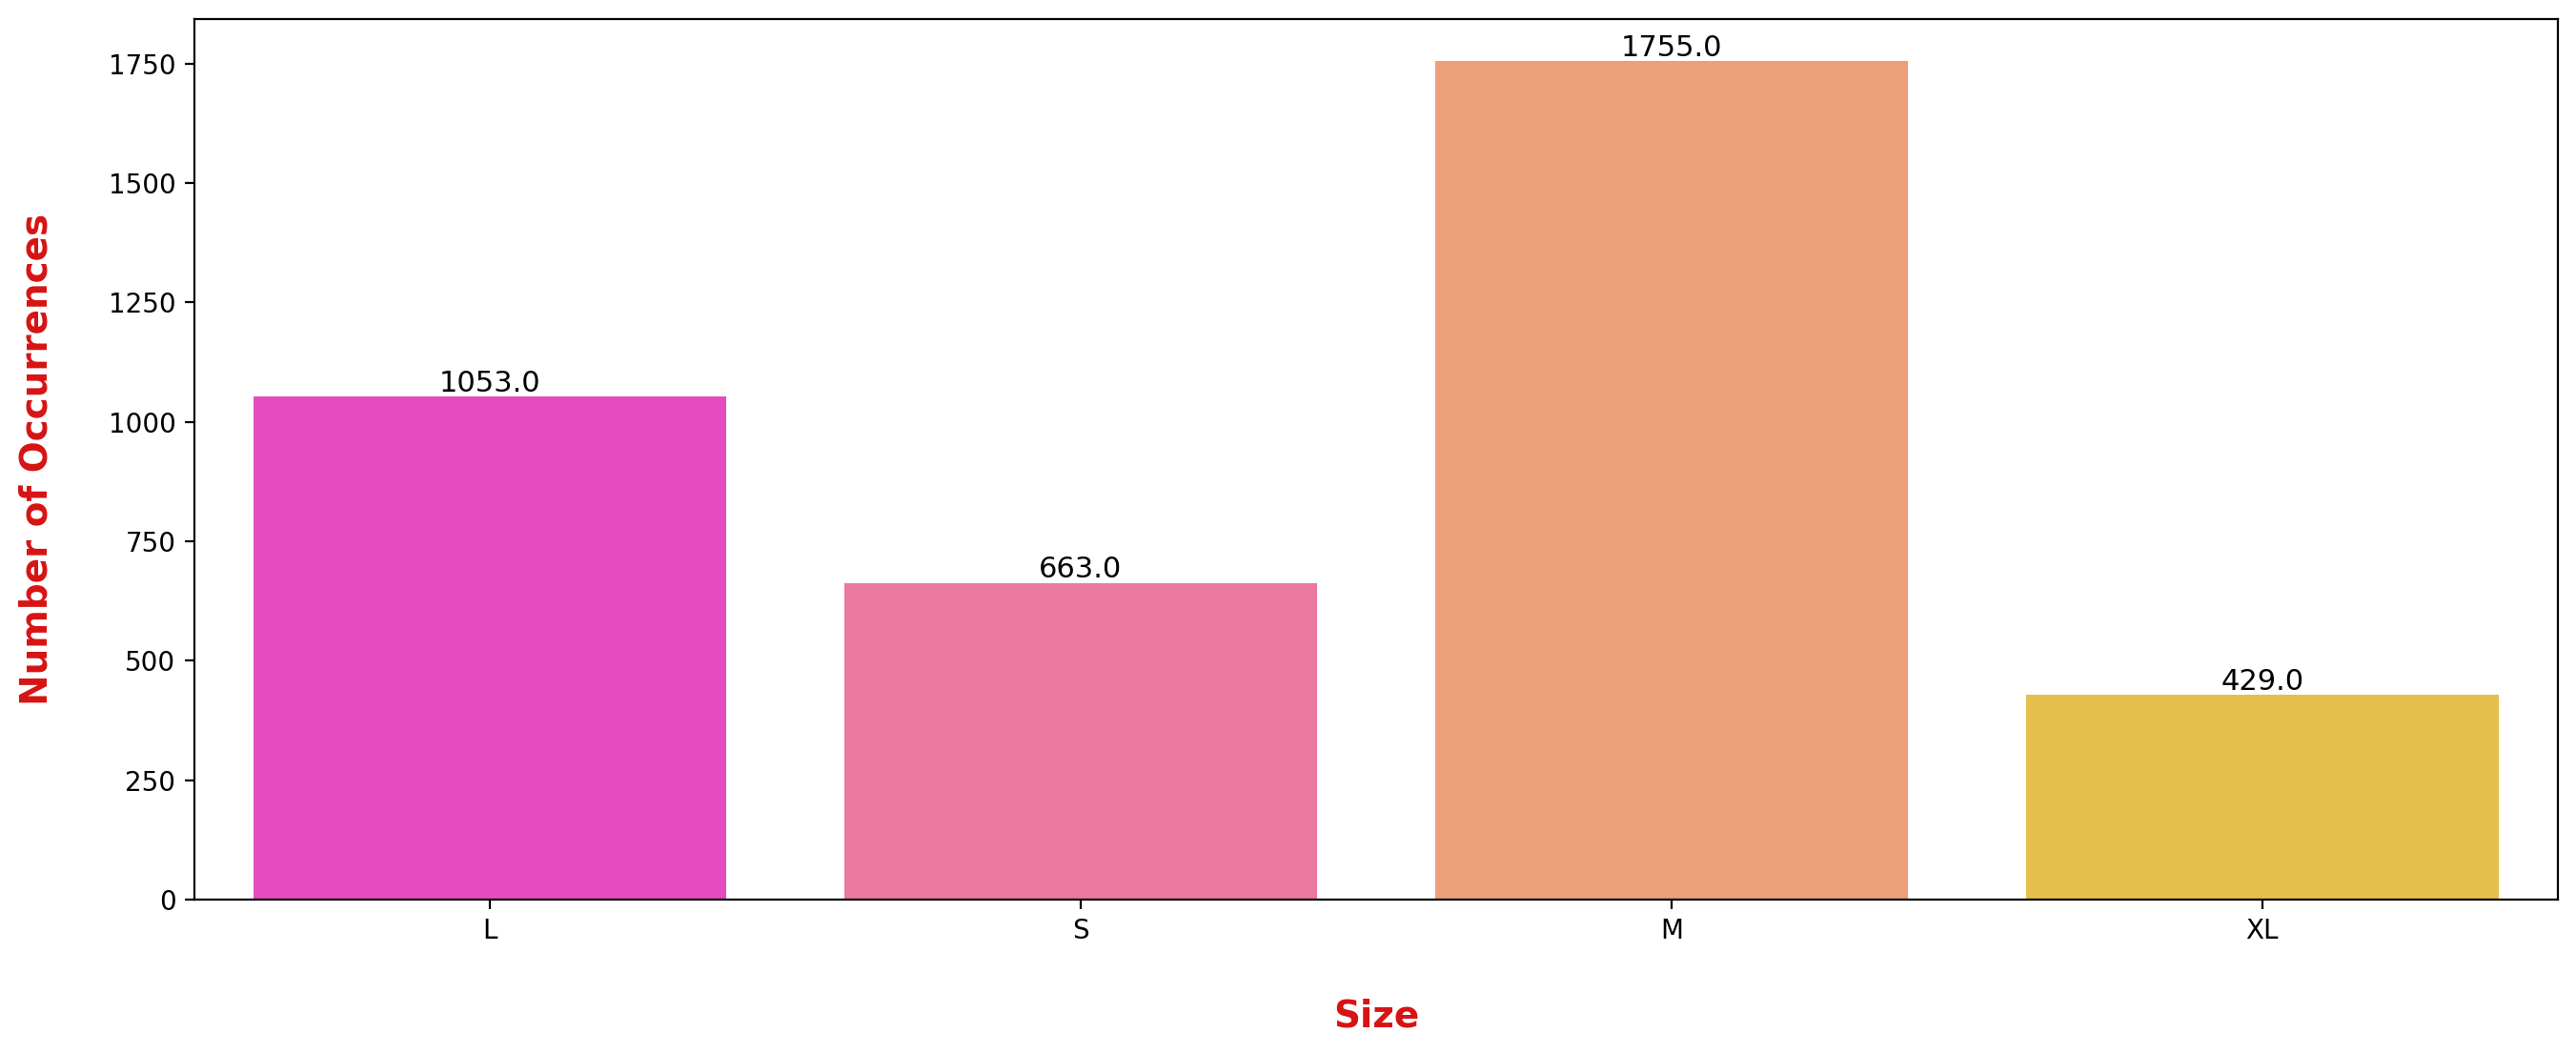

In [23]:
plt.figure(figsize=(16, 6), dpi=200)
sns.countplot(x="Size", data =df,palette="spring")
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

In [79]:
total_purchase_by_size = df[df['Category'] == 'Clothing'].groupby('Size')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Size for Clothing Items:")
print(total_purchase_by_size)

Total Purchase Amount by Size for Clothing Items:
Size
L     27864
M     47041
S     17416
XL    11943
Name: Purchase Amount (USD), dtype: int64


In [35]:
plt.figure(figsize = (20, 6), dpi=200)
fig = px.pie(df, names='Subscription Status')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title="Subscription Status"
)
fig.show()

<Figure size 4000x1200 with 0 Axes>

In [69]:
most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: PayPal


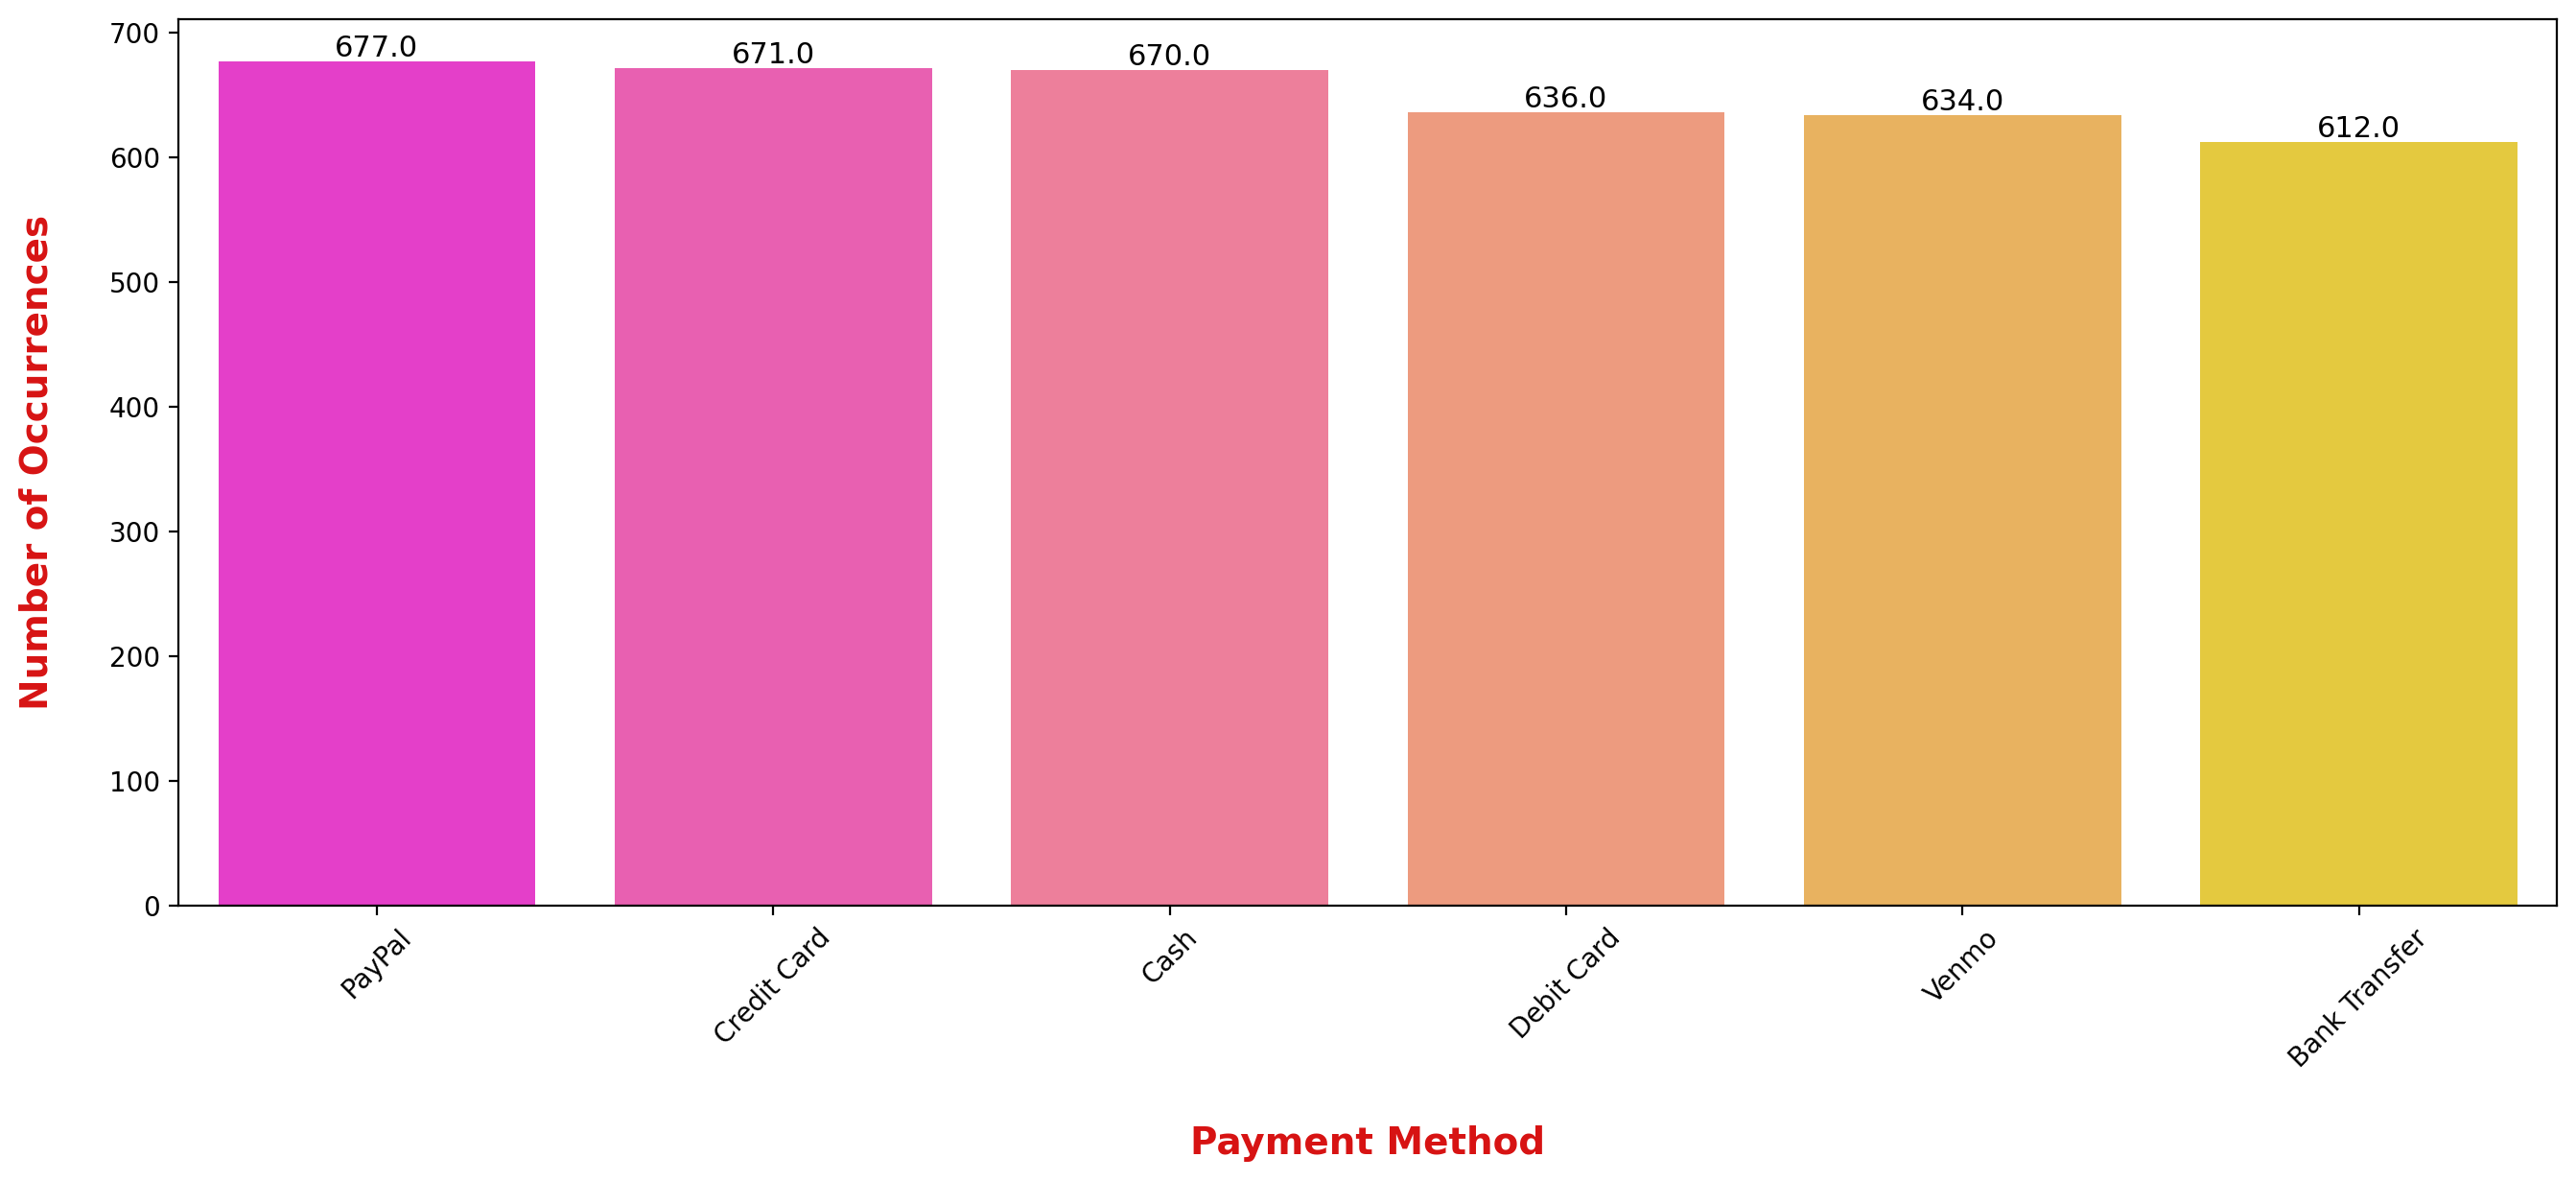

In [29]:
# Sort the dataframe by count of occurrences of Payment Method
sorted_df = df['Payment Method'].value_counts().reset_index().rename(columns={'index': 'Payment Method', 'Payment Method': 'count'})

plt.figure(figsize=(16, 6), dpi=200)

sns.countplot(x="Payment Method", data=df, order=sorted_df['Payment Method'], palette="spring")

plt.xlabel('Payment Method', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)

# Adding counts on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.xticks(rotation=45) 
plt.show()

In [34]:
fig = px.pie(df, names='Shipping Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title="Shipping Type"
)
fig.show()


**Analysing Top-Selling Products and Categories based on transaction frequency and revenue.**

In [50]:
# Top-Selling Products based on transaction frequency
most_common_item = df['Item Purchased'].mode()
print("Most Common Item Purchased:\n",most_common_item)

Most Common Item Purchased:
 0     Blouse
1    Jewelry
2      Pants
Name: Item Purchased, dtype: object


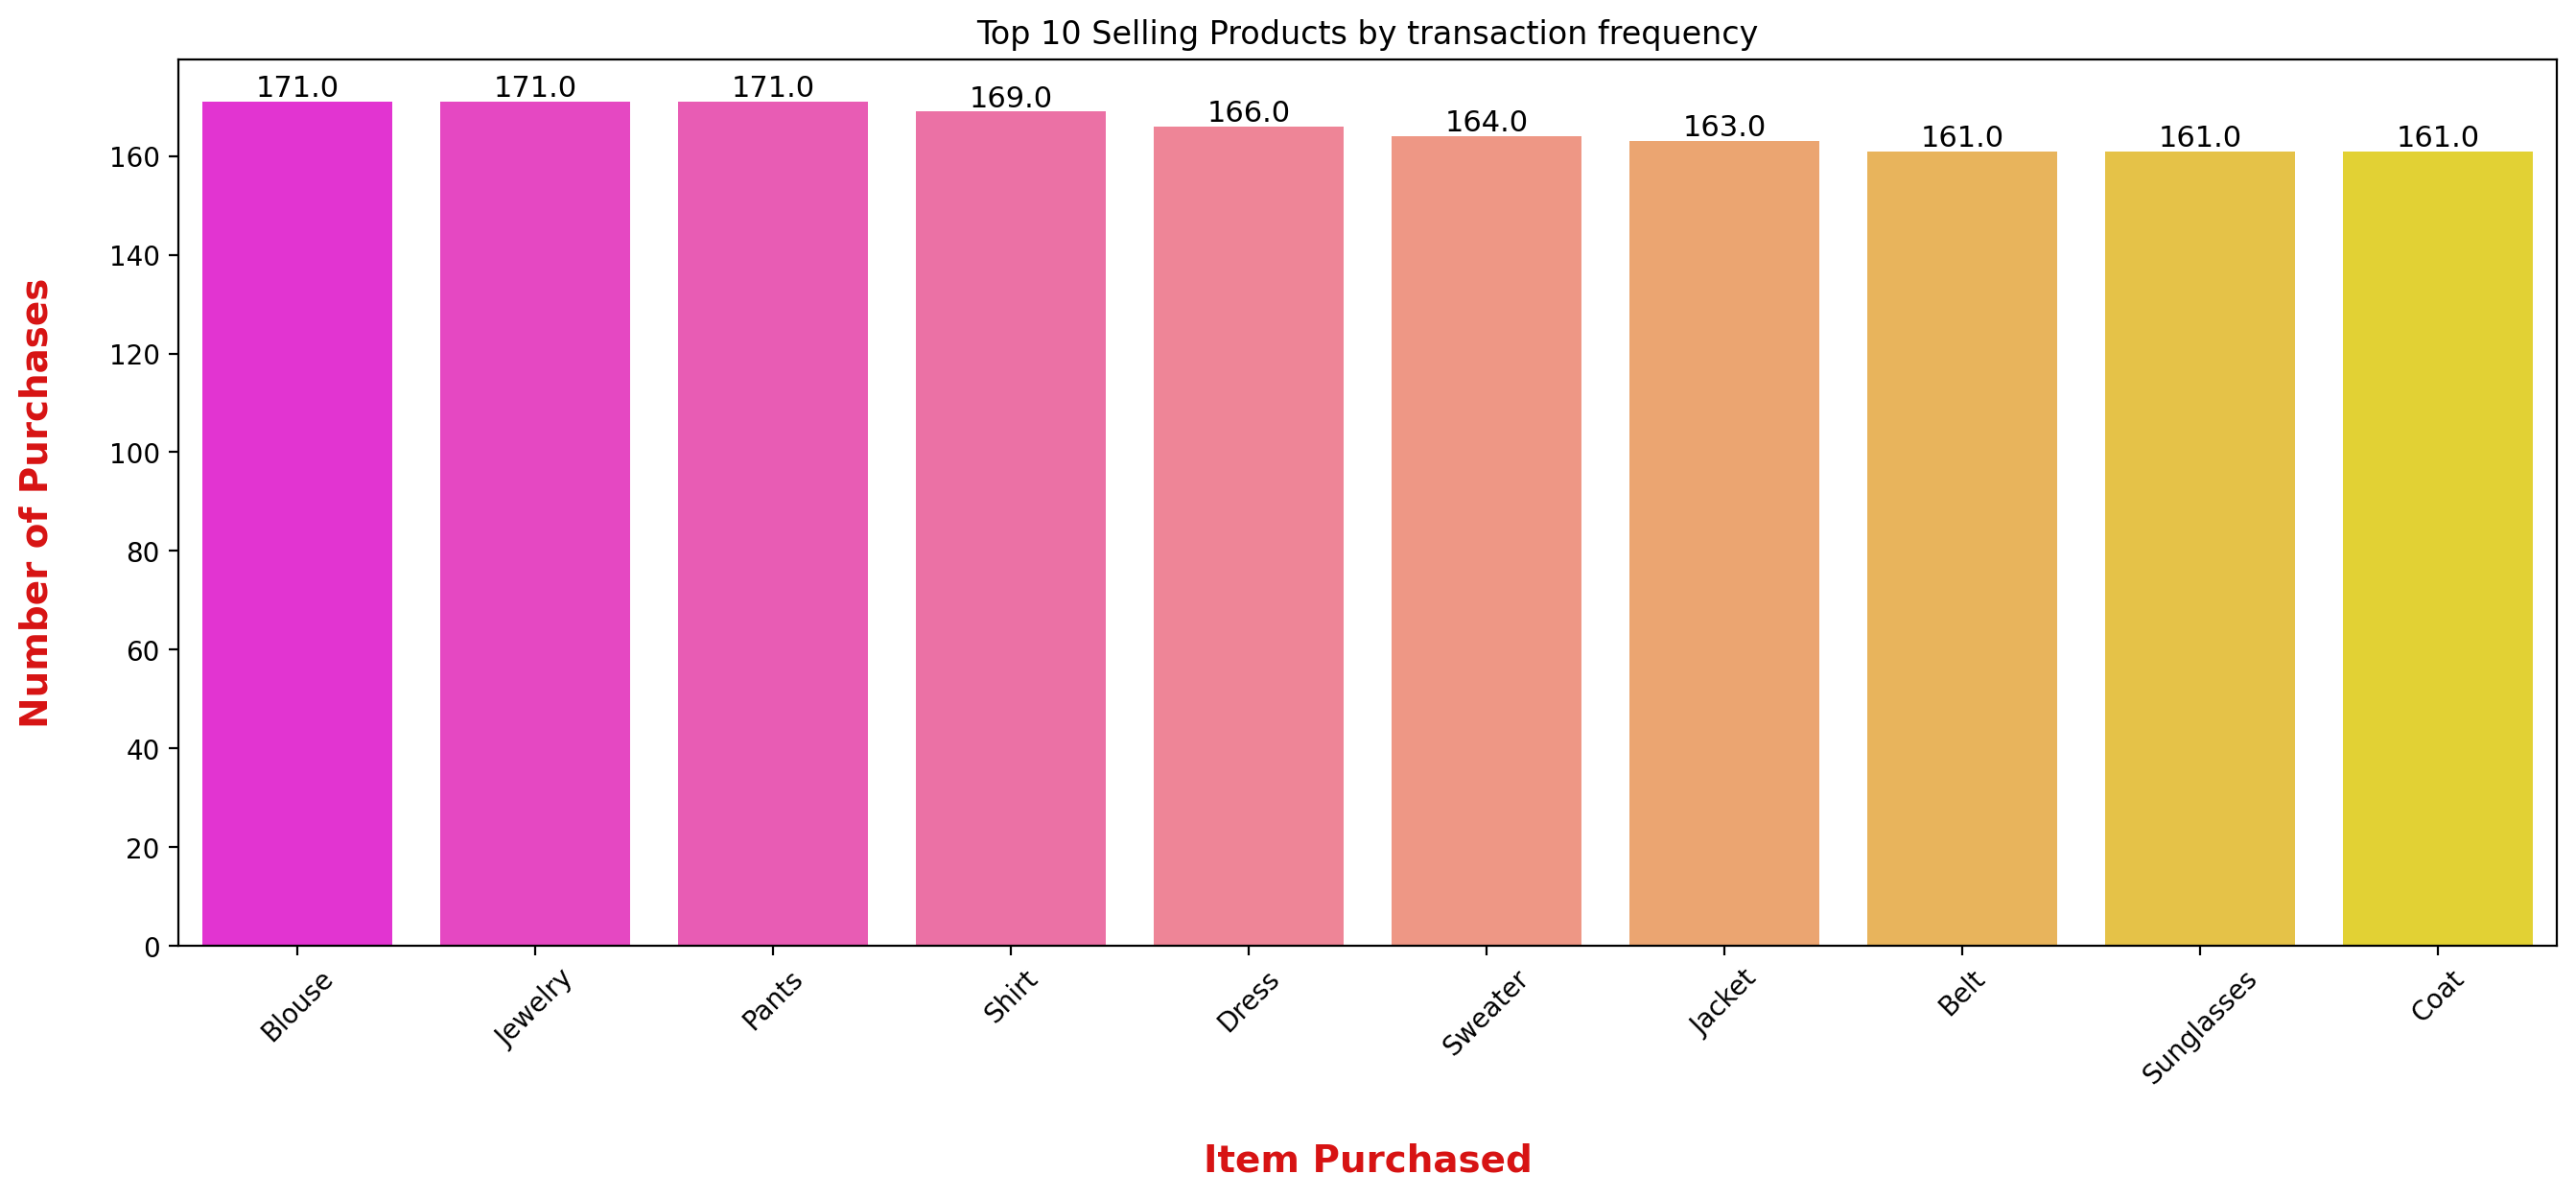

In [49]:
sorted_df = df['Item Purchased'].value_counts().nlargest(10).reset_index().rename(columns={'index': 'Item Purchased', 'Item Purchased': 'count'})

plt.figure(figsize=(16, 6), dpi=200)

sns.countplot(x="Item Purchased", data=df, order=sorted_df['Item Purchased'], palette="spring")

plt.xlabel('Item Purchased', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Number of Purchases', weight="bold", color="#D71313", fontsize=14, labelpad=20)

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.xticks(rotation=45) 
plt.title('Top 10 Selling Products by transaction frequency')
plt.show()

In [51]:
# Top-Selling Products based on revenue
top_products_revenue = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(10)

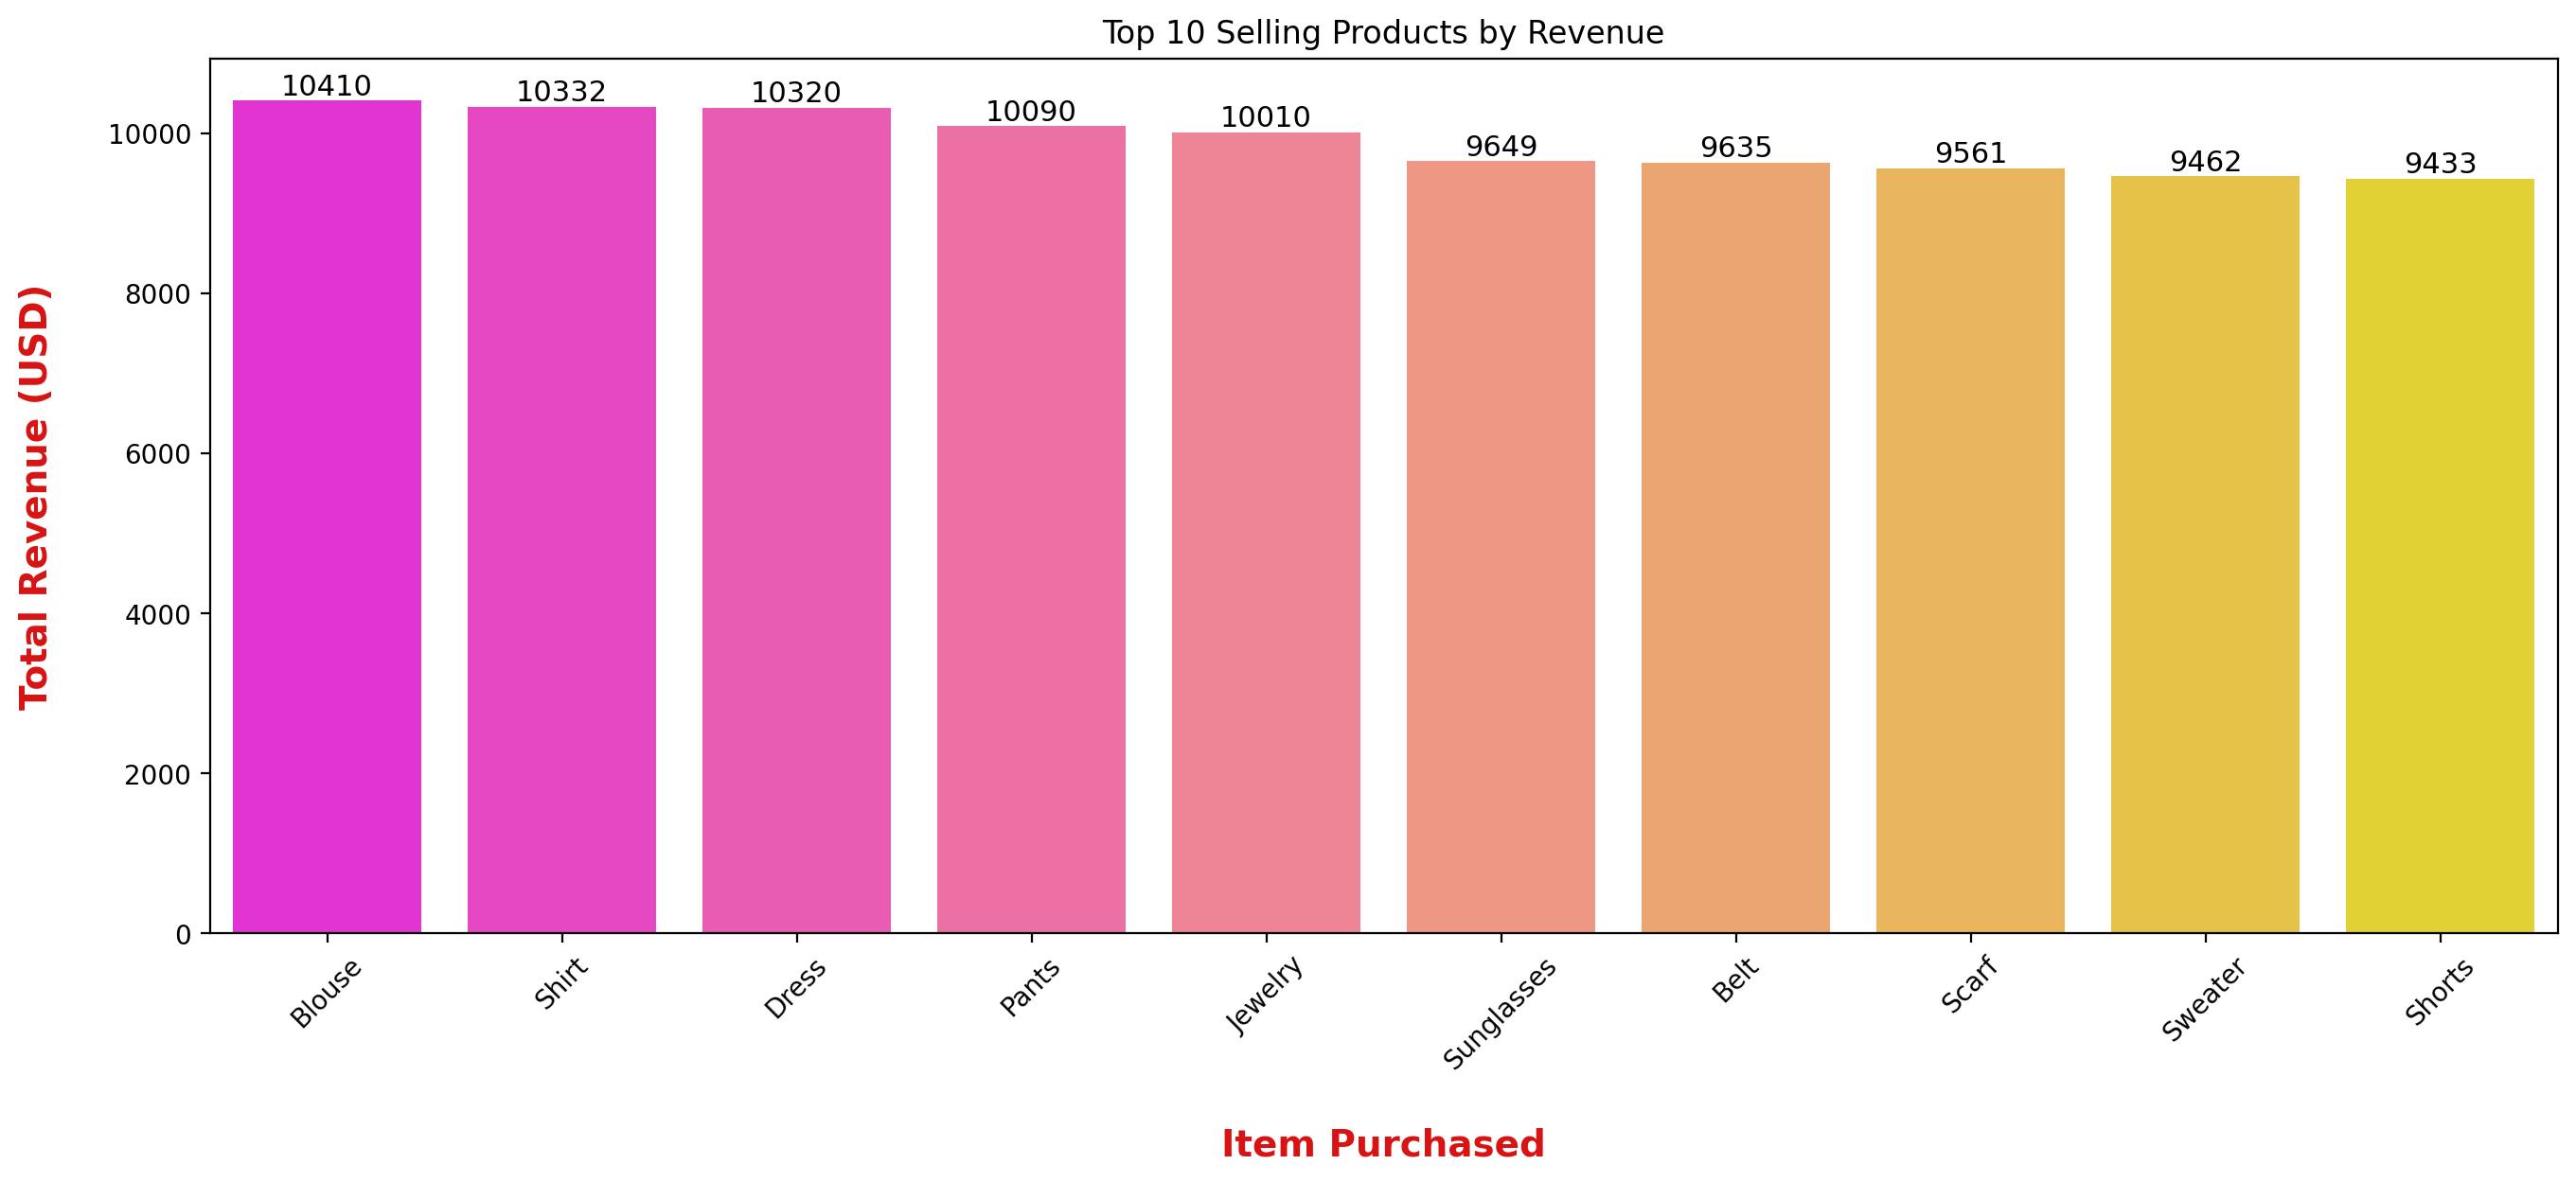

In [48]:
plt.figure(figsize=(16, 6), dpi=200)

sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values, palette="spring")

plt.xlabel('Item Purchased', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Total Revenue (USD)', weight="bold", color="#D71313", fontsize=14, labelpad=20)

for index, value in enumerate(top_products_revenue):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=45) 
plt.title('Top 10 Selling Products by Revenue')
plt.show()


In [54]:
# Top-Selling Categories based on transaction frequency
df["Category"].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

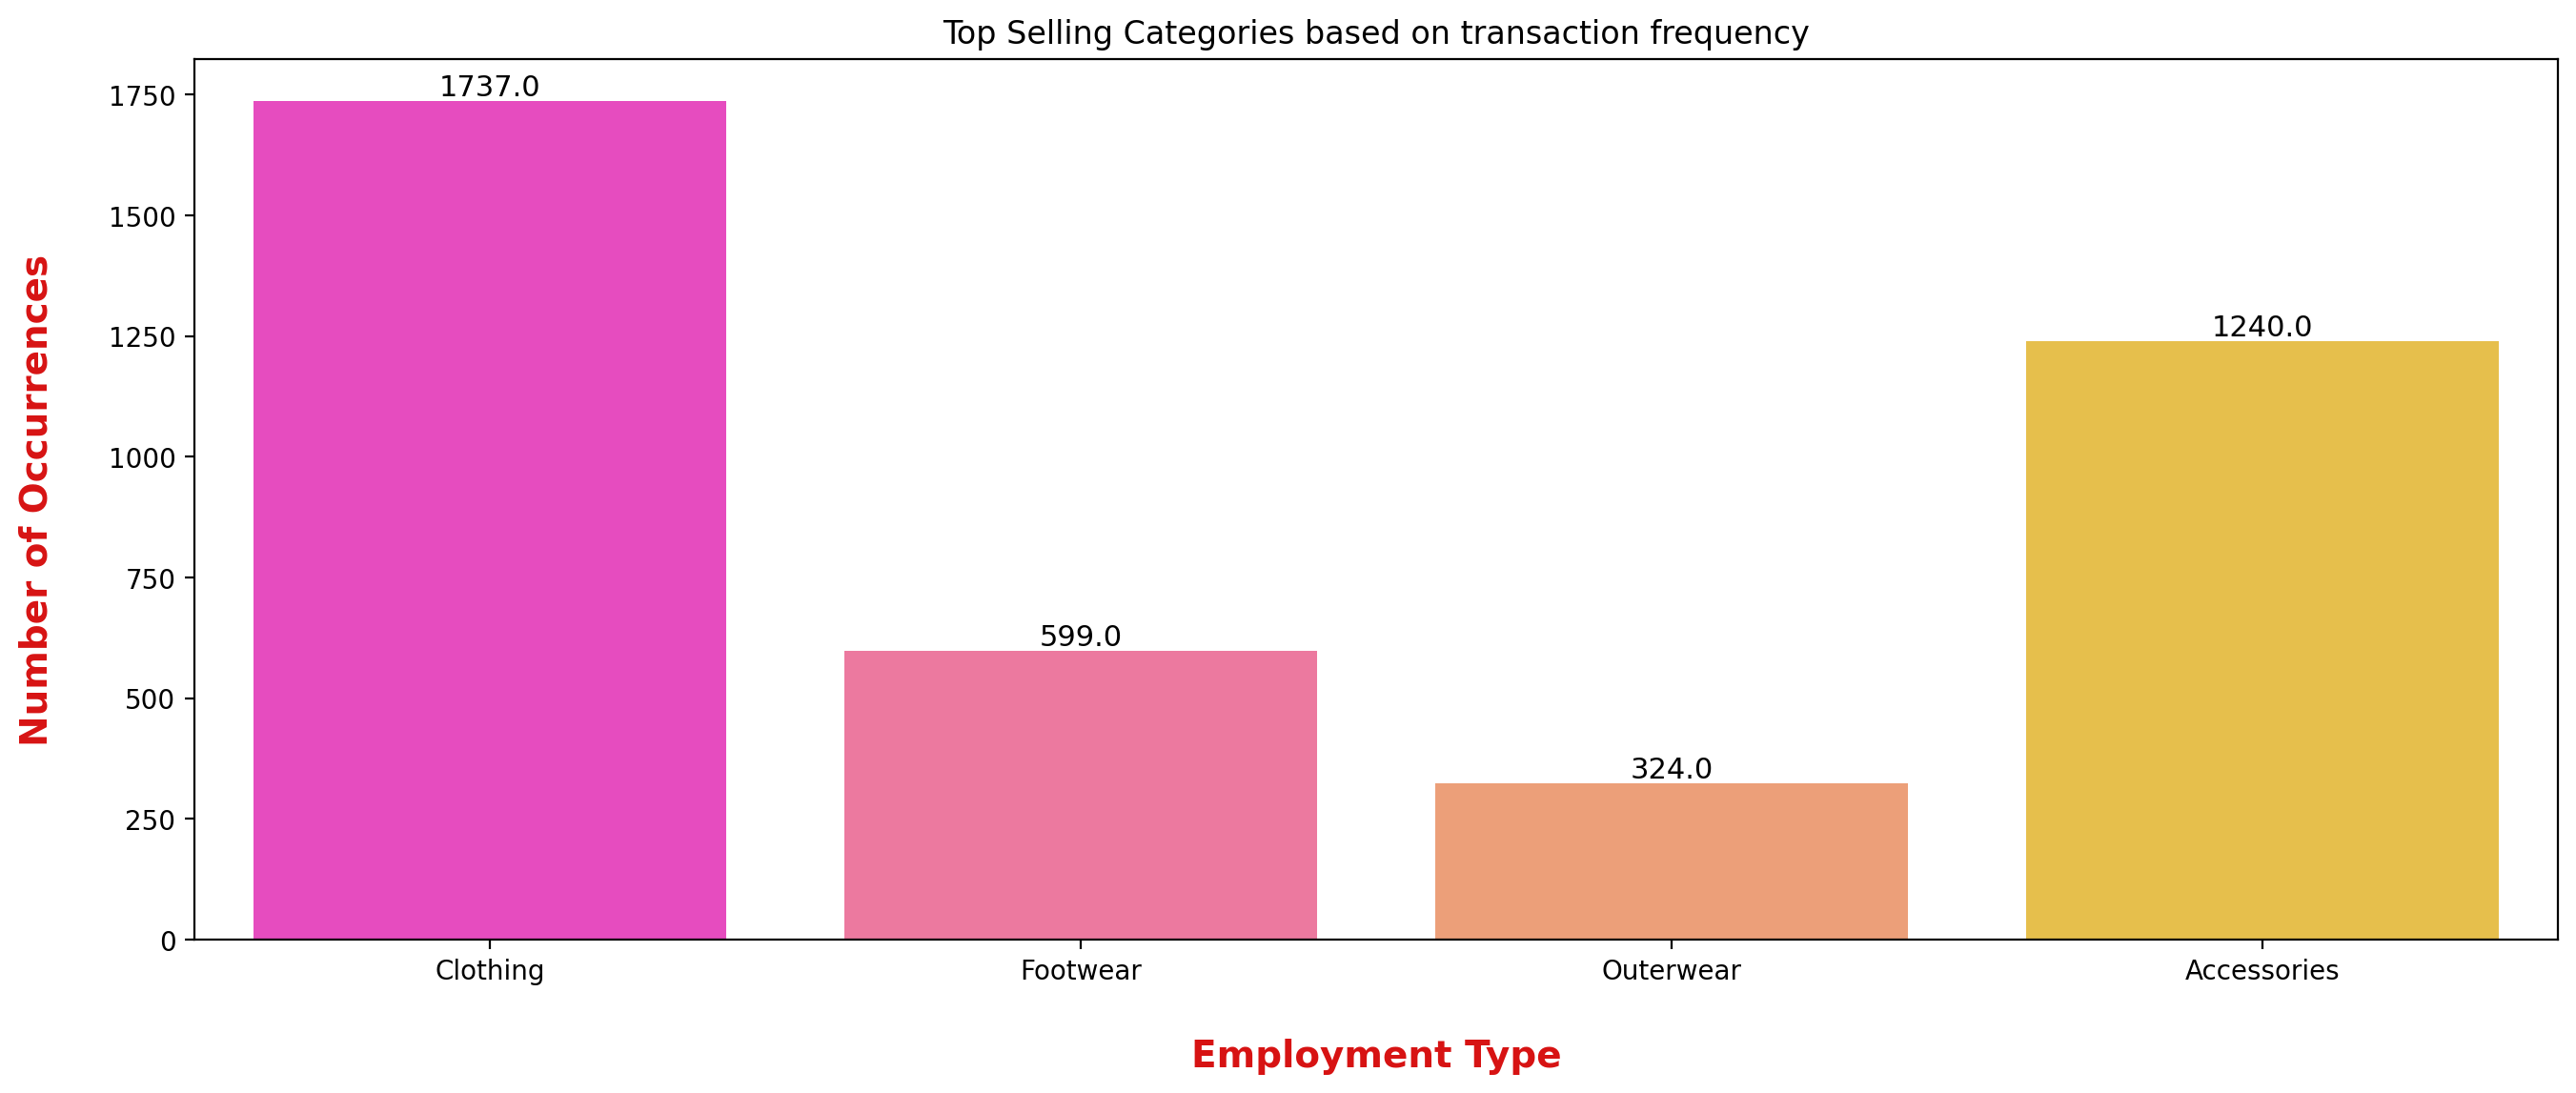

In [56]:
plt.figure(figsize=(16, 6), dpi=200)
sns.countplot(x="Category", data =df,palette="spring")
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Top Selling Categories based on transaction frequency')
plt.show()

In [58]:
# Top-Selling Categories based on revenue
total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


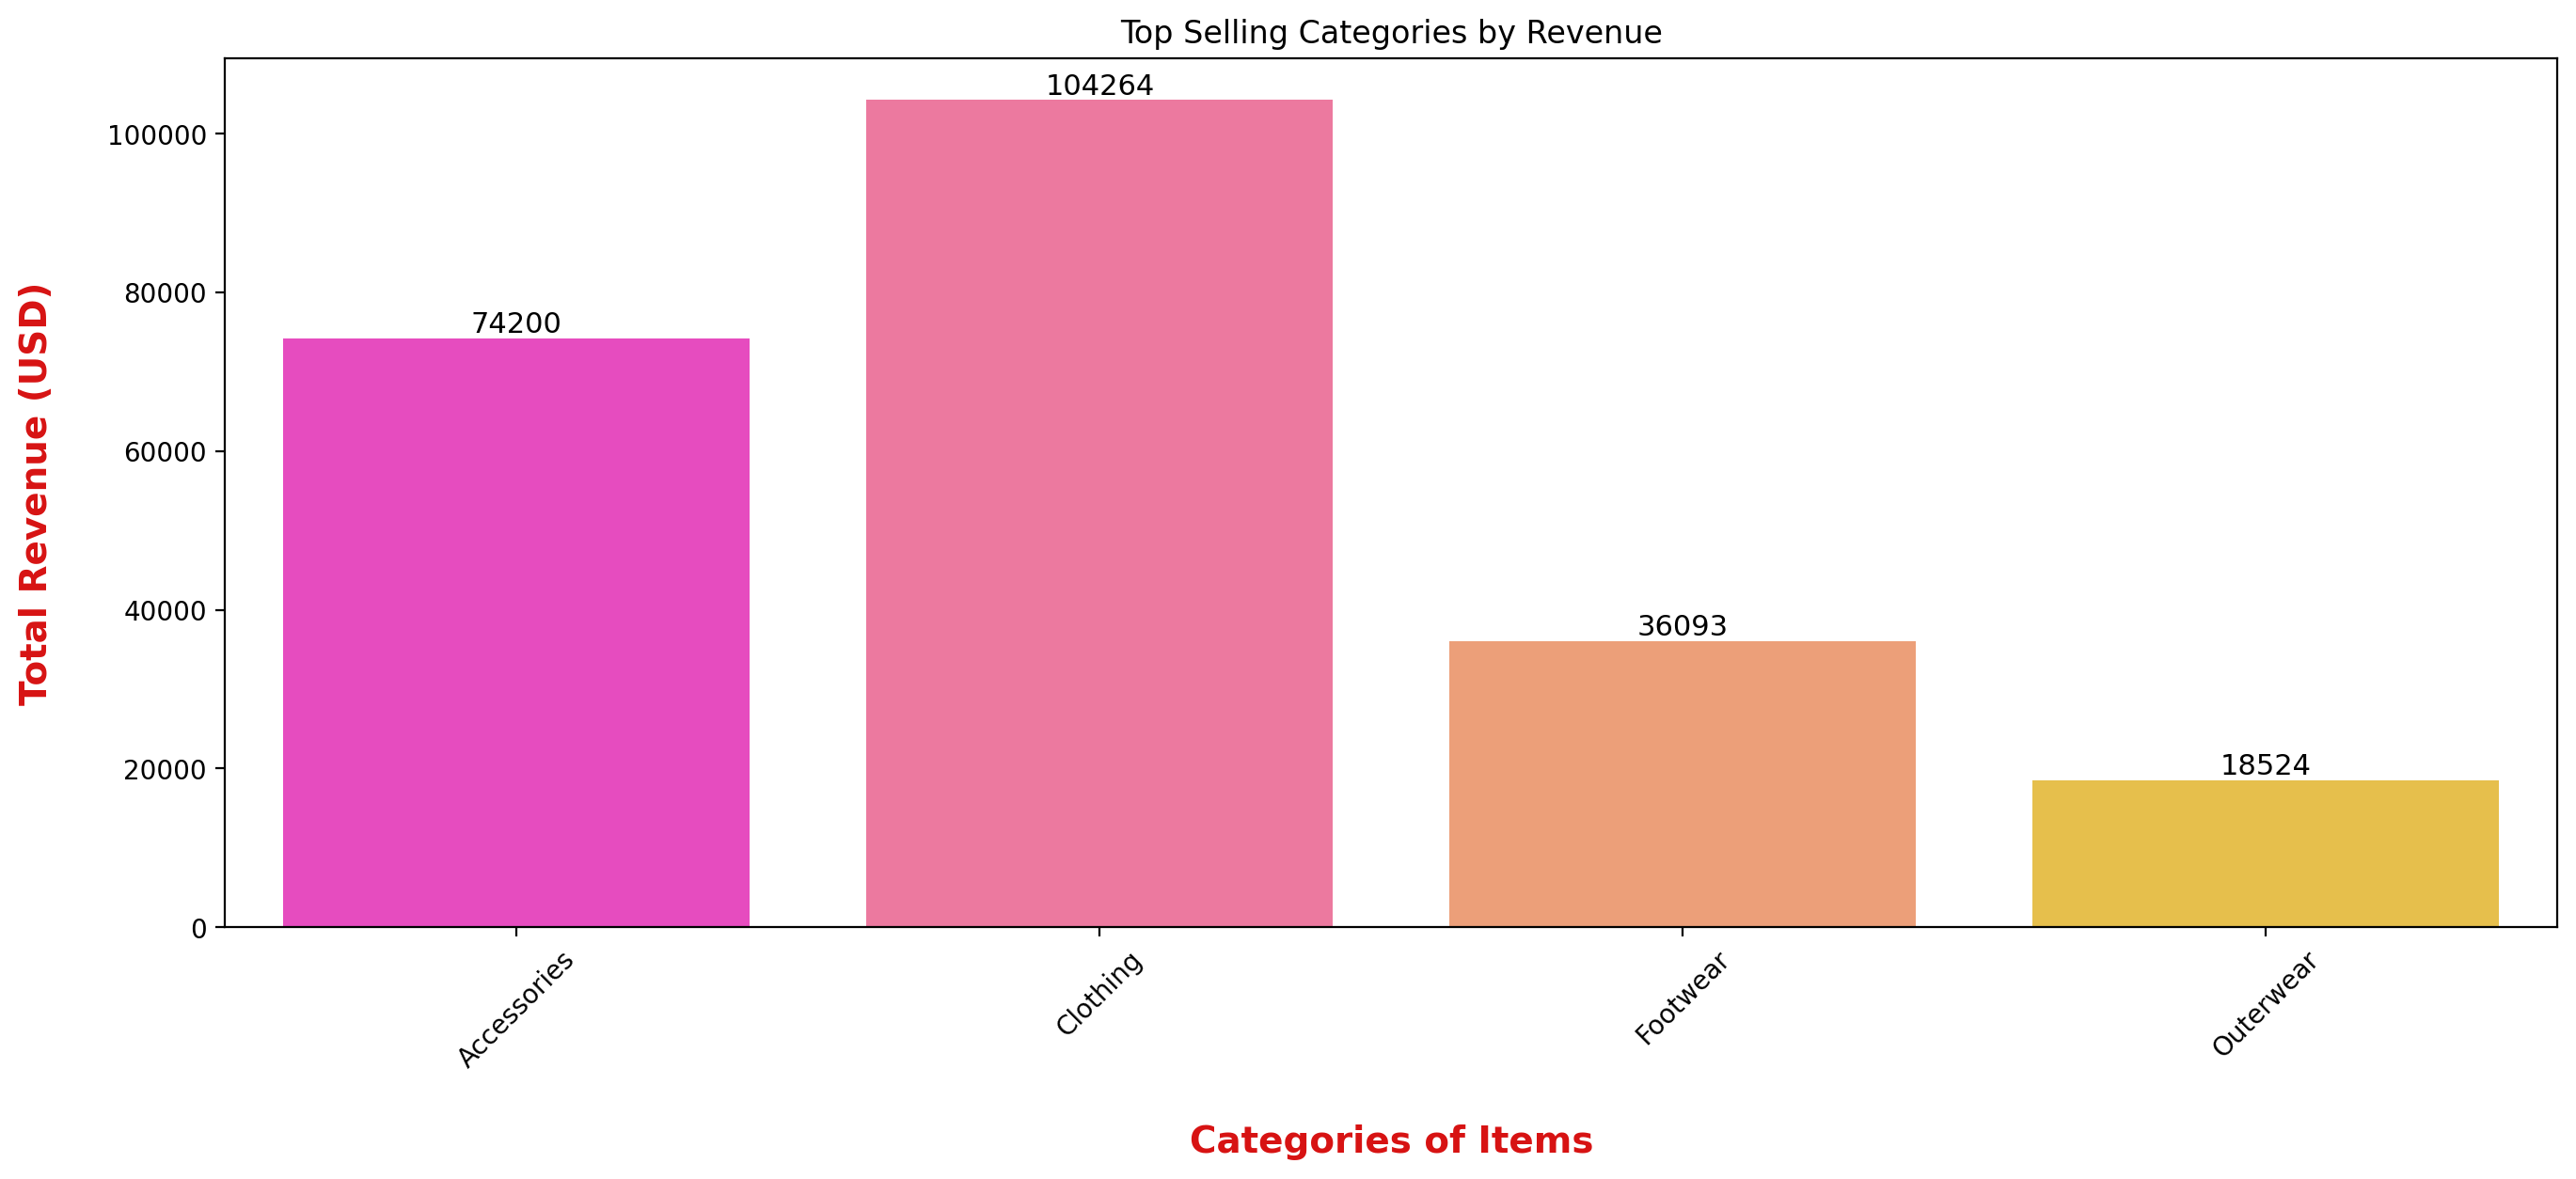

In [59]:
plt.figure(figsize=(16, 6), dpi=200)

sns.barplot(x=total_purchase_by_category.index, y=total_purchase_by_category.values, palette="spring")

plt.xlabel('Categories of Items', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Total Revenue (USD)', weight="bold", color="#D71313", fontsize=14, labelpad=20)

for index, value in enumerate(total_purchase_by_category):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=45) 
plt.title('Top Selling Categories by Revenue')
plt.show()

Most of revenue is coming from Clothing category

**Customer Ratings and Product Satisfaction: - Analysing customer ratings and feedback.**

In [67]:
average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


In [78]:
common_category_low_rating_female = df[(df['Gender'] == 'Female') & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most Common Category for Low Review Rating among Female Customers:", common_category_low_rating_female)

Most Common Category for Low Review Rating Female Customers: Clothing


In [70]:
subscription_count = df[df['Subscription Status'] == 'Yes']['Customer ID'].count()
print("Number of Customers with Subscription: ", subscription_count)

Number of Customers with Subscription:  1053


In [71]:
most_common_season = df['Season'].mode()[0]
print("Most Common Season for Purchases:", most_common_season)

Most Common Season for Purchases: Spring


In [27]:
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Review Rating:", max_review_rating)
print("Minimum Review Rating:", min_review_rating)

Maximum Review Rating: 5.0
Minimum Review Rating: 2.5


In [73]:
common_shipping_high_rating = df[df['Review Rating'] > 4]['Shipping Type'].mode()[0]
print("Most Common Shipping Type for High Review Ratings:", common_shipping_high_rating)

Most Common Shipping Type for High Review Ratings: Standard


**Impact of Discounts or Promotions on sales**

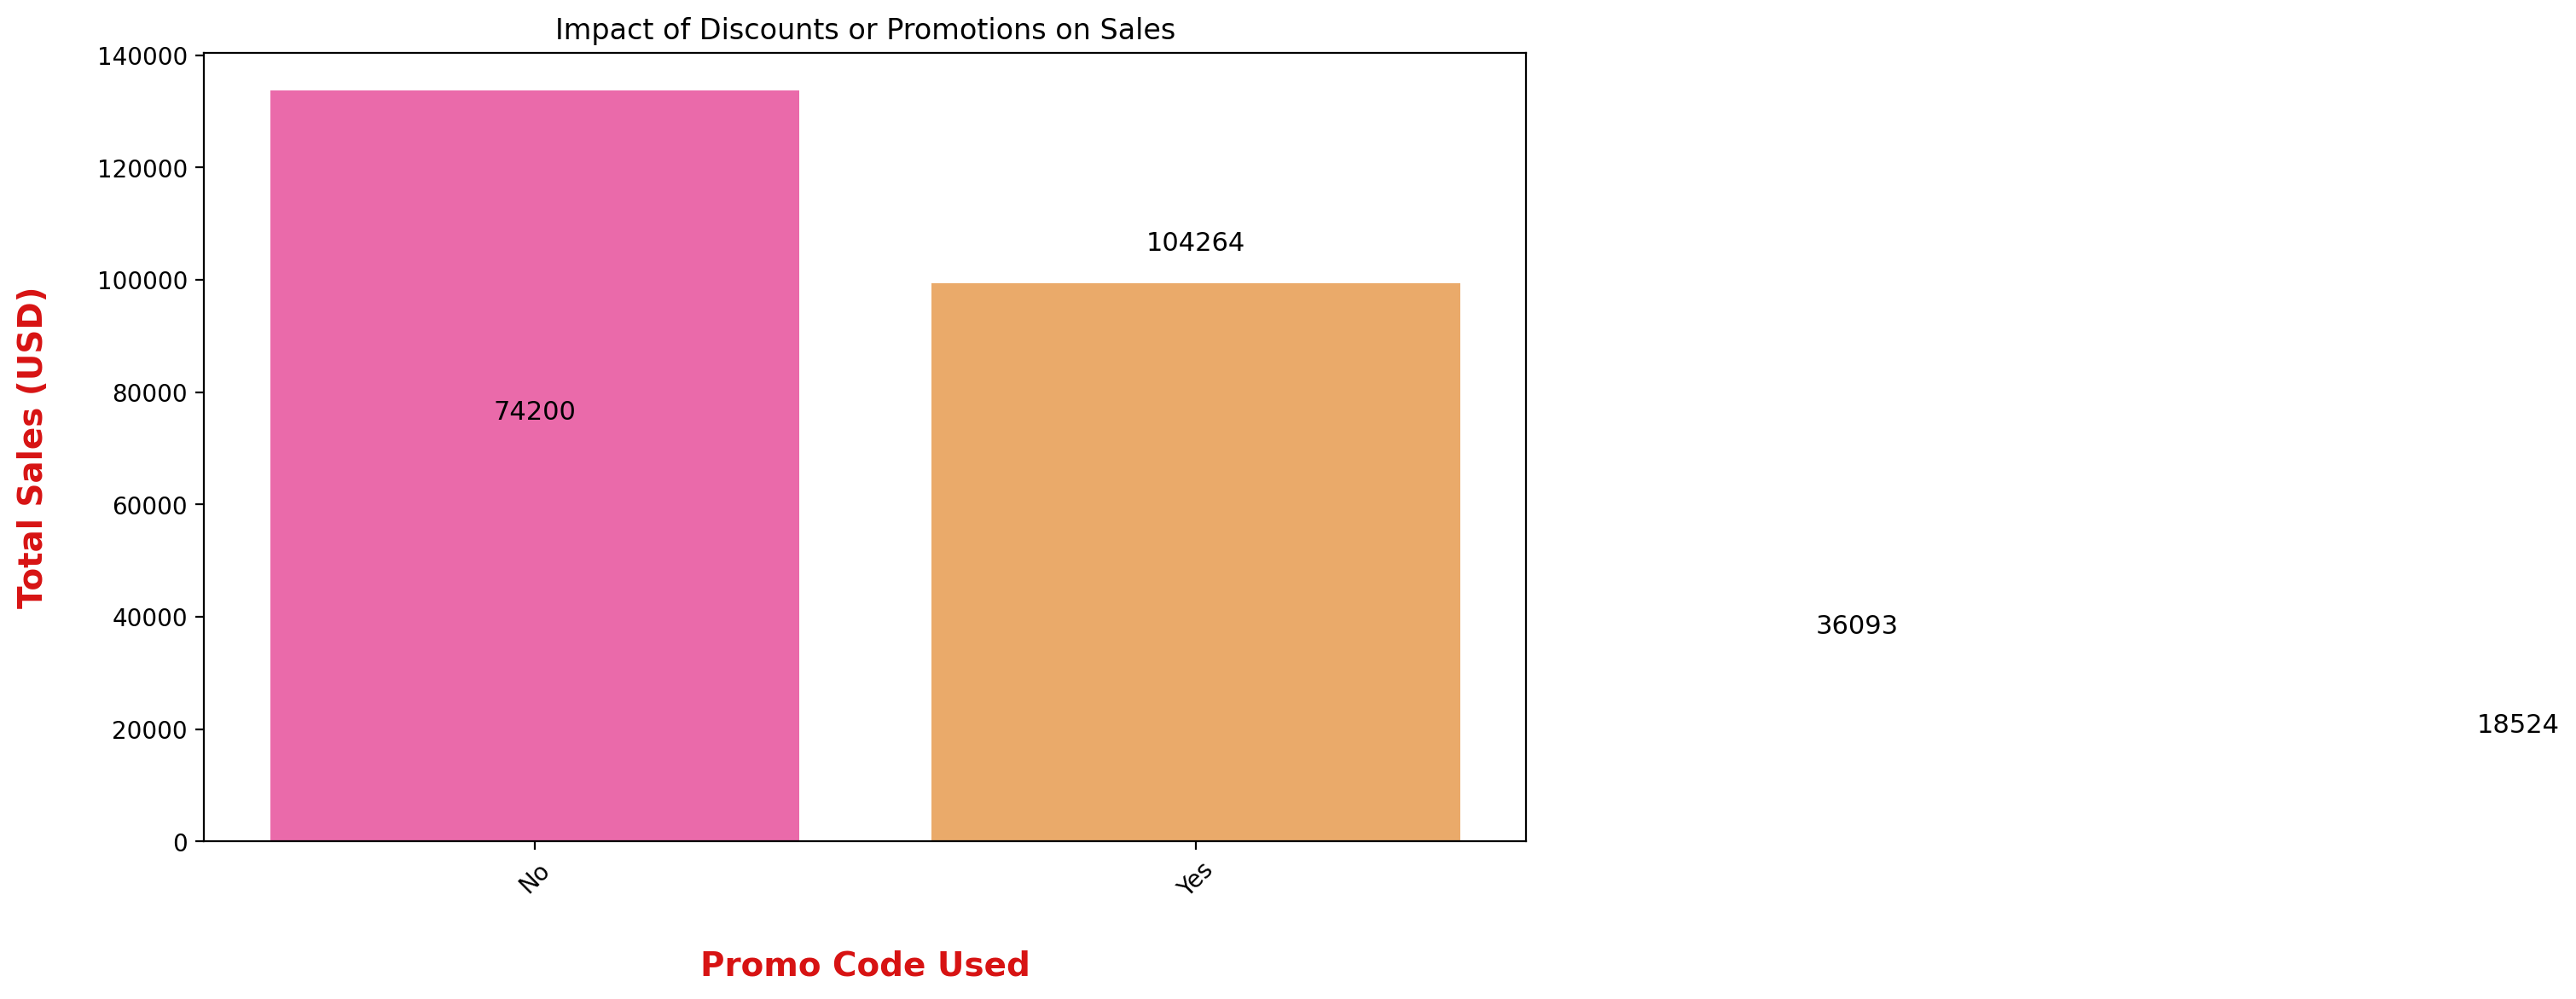

In [76]:
# Analyzing impact of discounts or promotions
promotions_sales = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum()
plt.figure(figsize=(10, 6), dpi=200)

sns.barplot(x=promotions_sales.index, y=promotions_sales.values, palette="spring")

plt.xlabel('Promo Code Used', weight="bold", color="#D71313", fontsize=14, labelpad=20)
plt.ylabel('Total Sales (USD)', weight="bold", color="#D71313", fontsize=14, labelpad=20)

for index, value in enumerate(total_purchase_by_category):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=11)

plt.xticks(rotation=45) 
plt.title('Impact of Discounts or Promotions on Sales')
plt.show()

**There is no as such influence of discount on sales**

In [82]:
from plotly.offline import iplot , plot 
df_Category_Review_Rating = df.groupby(['Category','Item Purchased'])['Review Rating'].mean()
category = df['Category'].unique().tolist()
colors = ['#FF5733', '#3498db', '#27ae60', '#f39c12']
j=0
for c in category:
    iplot(px.line(df_Category_Review_Rating.get(c),
                  template='plotly_dark',
                  color_discrete_sequence=[colors[j]],
                  markers=True,
                  labels={'value':'Review Rating'},
                  title=f'Review Rating for Category {c}'
                  ))
    j+=1

Tshirt, Sandal, Jacket, Gloves are most satisfied products of each category among people**

**Thank you**